<a href="https://colab.research.google.com/github/pswami12/DataScienceFiles/blob/main/Class_7_AIDL_4th_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from tensorflow.keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


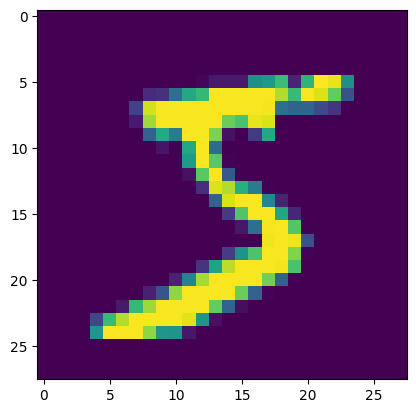

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
model = Sequential()

model.add(Convolution2D(10, kernel_size = 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, kernel_size = 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, kernel_size = 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, kernel_size = 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, kernel_size = 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, kernel_size = 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, kernel_size = 1, activation='relu')) #7

model.add(Convolution2D(10, kernel_size = 7))
model.add(Flatten())
model.add(Activation('softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 10)       40        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1456      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 batch_normalization_2 (Batc  (None, 22, 22, 32)       1

In [11]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Epoch 1: LearningRateScheduler setting learning rate to 0.003.
Epoch 1/20
118/118 [==============================] - 14s 33ms/step - loss: 0.2880 - accuracy: 0.9091 - val_loss: 5.3915 - val_accuracy: 0.1135 - lr: 0.0030

Epoch 2: LearningRateScheduler setting learning rate to 0.0022744503.
Epoch 2/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0636 - accuracy: 0.9805 - val_loss: 4.3567 - val_accuracy: 0.1286 - lr: 0.0023

Epoch 3: LearningRateScheduler setting learning rate to 0.0018315018.
Epoch 3/20
118/118 [==============================] - 3s 26ms/step - loss: 0.0472 - accuracy: 0.9850 - val_loss: 0.9398 - val_accuracy: 0.6801 - lr: 0.0018

Epoch 4: LearningRateScheduler setting learning rate to 0.0015329586.
Epoch 4/20
118/118 [==============================] - 3s 26ms/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0801 - val_accuracy: 0.9751 - lr: 0.0015

Epoch 5: LearningRateScheduler setting learning rate to 0.0013181019.
Epoch 5/20
118/118 [=======

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print(score)

[0.026276547461748123, 0.9921000003814697]
